# **TSA Claims Database**

---



# **Latar Belakang**

Transportation Security Administration (TSA) dibentuk pada tahun 2002, TSA merupakan salah satu bentuk respon dari  kejadian serangan 11 September. TSA membuat kebijakan pemeriksaan keamanan di sebagian besar bandara Amerika Serikat. Dengan banyaknya penumpang yang harus diperiksa di sebagian besar bandara , terkadang penumpang mengalami kejadian yang tidak diinginkan saat melalui proses TSA. Kejadian  itu seperti barang tertinggal, barang mengalami kerusakan, barang penumpang dicuri dan lain sebagainya. Namun seperti yang disebutkan dalam undang-undang Amerika Serikat, TSA telah menyiapkan proses klaim di mana penumpang dapat mengajukan klaim untuk meminta kompensas atas dugaan kesalahan yang disebabkan oleh TSA.

Sumber : [Website resmi dari TSA](https://www.tsa.gov/)

## Pernyataan Masalah

TSA menyediakan dataset yang dapat dianalisis sehingga hasil analisis dapat digunakan untuk pengambilan keputusan strategis. Berikut ini adalah beberapa pertanyaan yang dapat digunakan untuk menganalisis dataset dari TSA yang berguna bagi penumpang untuk meningkatkan perhatiannya agar tidak terjadi hal-hal yang tidak diinginkan.

**Bagaimana caranya agar bandara dapat meningkatkan keamanan, keselamatan, dan pelayanan kepada penumpang, sehingga penumpang dapat merasa lebih nyaman dan klaim yang masuk ke TSA dapat berkurang?**

# Data

TSA sebenarnya mempublikasikan semua data klaim yang mereka terima dan data tersebut diposting di web mereka [disini](https://www.tsa.gov/). Namun pada analisis kali ini data yang diambil adalah data dari situs Kaggle [disini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database/code) atau dengan data yang telah disediakan dalam bentuk csv.

Ada lebih dari 200.000 klaim data yang telah diajukan. Data tersebut akan diolah, dibersihkan, diuraikan dan disederhanakan akan lebih mudah untuk dilakukan analisis.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color = sns.color_palette()


Dataset TSA ini menyediakan data masing-masing klaim, meliputi kategori insiden, tanggal insiden, kategori barang rusak/dicuri/hilang, besarnya ganti rugi yang dituntut oleh penumpang, keputusan gugatan, dan lainnya. Terdapat 13 kolom yaitu:


1.   Claim Number  : Nomor ID klaim penumpang
2.   Date Received : Tanggal pengajuan klaim
3.   Incident Date : Tanggal insiden
4.   Airport Code  : Kode bandara
5.   Airport Name  : Nama bandara
6.   Airline Name  : Nama maskapai
7.   Claim Type    : Tipe pengajuan klaim
8.   Claim Site    : Tempat pengajuan klaim
9.   Item          : Item insiden
10.  Claim Amount  : Nominal pengajauan klaim
11.  Status        : Statis klaim
12.  Close Amount  : Nominal klaim disetujui
13.  Disposition   : Disposisi

Berikut ini adalah 5 baris atas dan bawah dari dataset TSA Claims:

In [66]:
# Membuka file
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Module 2 - TSA Claim Database/tsa_claims.csv')
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## **Data Understanding & Cleaning**

Seperti yang disebutkan sebelumnya, sebelum melakukan analisis, pemahaman terhadap data harus dilakukan. Hal ini sangat berguna dengan melakukan pemahaman data maka kita akan mengetahui anomali-anomali yang ada pada dataset. Setalah mengetahui anomali-anomali tersebut, maka dilakukanlah pembersihan data agar data dapat dilakukan analisis.


### Data Information & Missing Value
Melakukan pencarian informasi secara lengkap yang ada pada dataset mulai dari informasi kolom, tipe data, sampai dengan missing value yang ada pada dataset.

In [67]:
# Mengetahui informasi umum yang ada di sataset

print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [68]:
# mengetahui descriptive statistics summary dari dataset 

df.describe(include='object')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [69]:
# mengetahui informasi dari tiap kolom yang ada di dataset

df_info_tiap_kolom = []

for a in df.columns:
    df_info_tiap_kolom.append([a,
                               df[a].dtypes,                                     # melihat tipe data ditiap kolom
                               df[a].isna().sum(),                               # melihat total null sel di tiap kolom
                               round((((df[a].isna().sum())/(len(df)))*100),2),  # mengetahui persentasu null sel di tiap kolom
                               df[a].nunique(),                                  # mengetahui jumlah data unik di tiap kolom
                               df[a].unique()])                                  # menampilan data unik di tiap kolom

pd.DataFrame(data = df_info_tiap_kolom, columns=['nama_kolom', 'data_type', 'null', '%_of_null', 'unique','unique_sample'])

,nama_kolom,data_type,null,%_of_null,unique,unique_sample
0,Claim Number,object,0,0.00,204258,"[0909802M, 0202417M, 0202445M, 0909816M, 20050..."
1,Date Received,object,263,0.13,4007,"[4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe..."
2,Incident Date,object,2183,1.07,26807,"[12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0..."
3,Airport Code,object,8524,4.17,465,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ..."
4,Airport Name,object,8524,4.17,485,"[Newark International Airport, Seattle-Tacoma ..."
5,Airline Name,object,34374,16.83,318,"[Continental Airlines, nan, American Airlines,..."
6,Claim Type,object,7913,3.87,11,"[Property Damage, Passenger Property Loss, nan..."
7,Claim Site,object,740,0.36,6,"[Checkpoint, Checked Baggage, Other, Motor Veh..."
8,Item,object,3966,1.94,4704,"[Other, Luggage (all types including footlocke..."
9,Claim Amount,object,4043,1.98,36117,"[$350.00 , $100.00 , $278.88 , $50.00 , $84.79..."


Dari aktivitas pengenalan data diatas dapat diketahui poin-poin dibawah ini:

* Dataset tsa_claims.csv memiliki 204.267 baris dan 13 kolom
* Kolom dataset tersebut adalah`Claim Number`, `Date Received`, `Incident Date`, `Airport Code`, `Airport Name`, `Airline Name`, `Claim Type`, `Claim Site`, `Item`, `Claim Amount`, `Status`, `Close Amount`, `Disposition`
* Setiap kolom tersebut memiliki data yang kosong tersebut diwakilkan dengan nilai NaN
* Terdapat kolom yang memiliki nilai NaN yang tinggi (>10%) kolom tersebut yaitu `Airline Name`, `Close Amount`, `Disposition`
* Pada kolom `Date Received`, `Incident Date` ada beberapa data yang terbalik, seharusnya `Incident Date` tidak boleh lebih dari `Date Received` karena laporan klaim selalu datang setelah terjadinya insiden sehingga tidak masuk akal apabila tanggal laporan lebih awal dari tanggal terjadinya insiden.
* Seluruh kolom memiliki tipe data object

Dari poin-poin diatas, akan dilakukan pembersihan seperti berikut:

*   Dalam analisis kali ini ada beberapa kolom yang tidak dibutuhkan karene tidak sesuai dengan analisis sehingga dapat dihapus, kolom tersebut yaitu kolom `Airport Code`, `Item` dan kolom `Claim Number`
*   Ada bebera kolom yang tipe datanya tidak sesuai, pada kolom `Date Received`	`Incident Date` seharusnya memiliki tipe data datetime, kemudian pada kolom `Claim Amount` `Close Amount` seharusnya memiliki tipe data float
* Melakukan swap data pada kolom `Date Received` dan `Incident Date` yang terbalik
*   Pada analisis ini nama kolom harus diubah agar memudahkan proses analisis
Pengenalan data diatas juga didapatkab beberapa informasi seputar **missing value** yaitu:
* Pada analisis kali ini missing value yang lebih dari 10% dianggap memiliki nilai yang tinggi dan yang kurang dari 10% dianggap rendah.
* Kolom yang memiliki missing value kategori tinggi adalah `Airline Name`, `Close Amount` dan `Disposition` sedangkan sisanya berada di kategori rendah.

### Handling Dataset & Missing Values

In [70]:
# Mengubah nama setiap kolom terlebih dahulu agar lebih mudah dalam melakukan analisis
column_name = ['claim_number','date_received', 'incident_date', 'airport_code', 'airport_name',
             'airline', 'claim_type', 'claim_site', 'item', 'claim_amount', 'status',
             'close_amount', 'disposition',]

column_mapper = dict(zip(df.columns, column_name))
df.rename(columns=column_mapper, inplace=True)
df.head()

,claim_number,date_received,incident_date,airport_code,airport_name,airline,claim_type,claim_site,item,claim_amount,status,close_amount,disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


#### 1. Hapus missing value kolom `claim_amount`

Karena kolom `claim_amount` memiliki missing value sebesar 1,98 % dari dataset atau sebesar 4043 maka lebih baik dihapus. Data ini dihapus karena value dari kolom `claim_amount` sangat berpengaruh pada proses klaim jadi apabila value-nya tidak ada maka dianggap penumpang tidak mengajukan klaim.

In [71]:
# mengetahui jumlah value yang kosong dikolom claim_amount
df['claim_amount'].isna().sum()

4043

In [72]:
# menghapus seluruh row yang memiliki value kosong dikolom claim_amount
df.dropna(subset=['claim_amount'], inplace = True)
df['claim_amount'].isna().sum()

0

#### 2. Merapikan kolom `status`

Di kolom `status` memiliki data unik yang banyak, padahal beberapa data unik tersebut memiliki maksud yang sama. Maka dari itu kali ini akan merapikan kolom `status` agar memiliki 4 value yaitu **Approved, Denied, Settled, Cenceled.**
1. **Approved** berarti klaim yang diajukan disetujui dan diganti penuh (Approve In Full).
2. **Denied** berarti klaim yang diajukan ditolak.
3. **Settled** berarti klaim yang diajukan disetujui namun nominal yang diberikan hanya sebagian dari klaim yang diajukan.
4. **Cenceled** berarti klaim yang diajukan oleh penumpang dibatalkan oleh penumpang atau pihak lain.

In [73]:
# menghitung jumlah data pada tiap data unik di kolom status
df['status'].value_counts()

Denied                                                                                                                           68008
Approved                                                                                                                         34786
Deny                                                                                                                             28237
Settled                                                                                                                          27744
-                                                                                                                                12752
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          5905
Settle                                                 

In [74]:
# mengubah beberapa data unik kedalam 4 kategori data unik yang telah ditentukan
df.loc[(df['status'].isin(['Approve in Full'])),'status']='Approved'
df.loc[(df['status'].isin(['Deny'])),'status']='Denied'
df.loc[(df['status'].isin(['Settle'])),'status']='Settled'
df.loc[(df['status'].isin(['Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.'])),'status']='Denied'

df['status'].value_counts()

Denied                                               99530
Approved                                             47150
Settled                                              33510
-                                                    12752
Canceled                                              5905
Closed as a contractor claim                          1258
In litigation                                          108
In review                                                9
Claim has been assigned for further investigation        1
Pending response from claimant                           1
Name: status, dtype: int64

In [75]:
# Menghapus data unik yang tidak bisa masuk ke dalam 4 kategori data unik yang telah ditentukan
df.drop(df[df['status'] == 'In review'].index, inplace=True)
df.drop(df[df['status'] == 'In litigation'].index, inplace=True)
df.drop(df[df['status'] == 'Claim has been assigned for further investigation'].index, inplace=True)
df.drop(df[df['status'] == 'Pending response from claimant'].index, inplace=True)
df.drop(df[df['status'] == 'Closed as a contractor claim'].index, inplace=True)
df.drop(df[df['status'] == '-'].index, inplace=True)

display(df['status'].isna().sum())
display(df['status'].value_counts())

0

Denied      99530
Approved    47150
Settled     33510
Canceled     5905
Name: status, dtype: int64

####3. Mengatur kolom `disposition`

Mengecek kolom `disposition` berdasarkan kolom `status`, karena dengan mengetahui data dari kolom `status` maka kita bisa mengisi kolom `disposition`. Sebagai contoh apabila kolom `status` berisi Approved maka di kolom `disposition` dapat diisi dengan nilai Approved in full.

In [76]:
# mengecek jumlah data kosong di kolom disposition sesuai dengan value di kolom status
df[df['disposition'].isna()]['status'].value_counts()

Denied      31551
Approved    12364
Canceled     5896
Settled      5766
Name: status, dtype: int64

In [77]:
# mengisi data kosong di kolom `disposition` yang berisi 'Approved' di kolom `status` dengan 'Approve in full'
df.loc[(df['disposition'].isna())&(df['status'].isin(['Approved'])),'disposition']='Approve in Full'

# mengisi data kosong di kolom `disposition` yang berisi 'Settled' di kolom `status` dengan 'Settle'
df.loc[(df['disposition'].isna())&(df['status'].isin(['Settled'])),'disposition']='Settle'

# mengisi data kosong di kolom `disposition` yang berisi 'Canceled' di kolom `status` dengan 'Cencel'
df.loc[(df['disposition'].isna())&(df['status'].isin(['Canceled'])),'disposition']='Cancel'

# mengisi data kosong di kolom `disposition` yang berisi 'Denied' di kolom `status` dengan 'Deny'
df.loc[(df['disposition'].isna())&(df['status'].isin(['Denied'])),'disposition']='Deny'

display(df['disposition'].isna().sum())
display(df['disposition'].value_counts())

0

Deny               99527
Approve in Full    47158
Settle             33514
Cancel              5896
Name: disposition, dtype: int64

#### 4. Menghapus kolom `airport_code`, `item`, dan `claim_number`

Menghapus kolom `airport_code`, `item` dan kolom `claim_number`. Kolom-kolom tersebut tidak dibutuhkan karena tidak sesuai dengan kebutuhan analisis kali ini sehingga dengan dihapusnya kolom-kolom tersebut akan lebih mudah untuk melakukan analisis.


In [78]:
# menghapus 3 kolom yang tidak dibutuhkan dalam analisis
df.drop(columns=['airport_code', 'item', 'claim_number'], inplace = True)

#### 5. Mengubah tipe data dan merapikan kolom `date_received`, `incident_date`

Mengubah kolom `date_received`,	`incident_date` agar memiliki tipe data datetime. Kemudian melakukan swap data pada kolom `date_received`,	`incident_date` yang terbalik karena seharusnya	`incident_date` tidak boleh lebih dari `date_received` karena laporan klaim selalu datang setelah terjadinya insiden sehingga tidak masuk akal apabila tanggal laporan lebih awal dari tanggal terjadinya insiden.


In [79]:
# mengubah tipe data kolom tanggal
df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')
df.dropna(subset=['date_received', 'incident_date'], inplace=True)
# df.drop(df.columns[[0]], axis = 1, inplace= True)

# menghapus data yang tidak diperlukan
df.drop(df[df['date_received'].dt.year < 2002].index, inplace=True)
df.drop(df[df['incident_date'].dt.year < 2002].index, inplace=True)
df.drop(df[df['date_received'].dt.year > 2015].index, inplace=True)
df.drop(df[df['incident_date'].dt.year > 2015].index, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185074 entries, 0 to 204206
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_received  185074 non-null  datetime64[ns]
 1   incident_date  185074 non-null  datetime64[ns]
 2   airport_name   178608 non-null  object        
 3   airline        153905 non-null  object        
 4   claim_type     179023 non-null  object        
 5   claim_site     184652 non-null  object        
 6   claim_amount   185074 non-null  object        
 7   status         185074 non-null  object        
 8   close_amount   132171 non-null  object        
 9   disposition    185074 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 19.6+ MB


,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
0,2002-01-04,2002-12-12,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,$350.00,Approved,$350.00,Approve in Full
1,2002-02-02,2004-01-16,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,$100.00,Settled,$50.00,Settle
2,2002-02-04,2003-11-26,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,$278.88,Settled,$227.92,Settle
3,2002-02-07,2003-01-06,Miami International Airport,American Airlines,Property Damage,Checkpoint,$50.00,Approved,$50.00,Approve in Full
4,2002-02-18,2005-02-05,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,$84.79,Approved,$84.79,Approve in Full


In [80]:
# mengubah kolom incident_date dan date_received menjadi timestamp
df['incident_date'] = df['incident_date'].values.astype(np.int64) // 10 ** 9
df['date_received'] = df['date_received'].values.astype(np.int64) // 10 ** 9
df.head()

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
0,1010102400,1039651200,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,$350.00,Approved,$350.00,Approve in Full
1,1012608000,1074211200,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,$100.00,Settled,$50.00,Settle
2,1012780800,1069804800,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,$278.88,Settled,$227.92,Settle
3,1013040000,1041811200,Miami International Airport,American Airlines,Property Damage,Checkpoint,$50.00,Approved,$50.00,Approve in Full
4,1013990400,1107561600,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,$84.79,Approved,$84.79,Approve in Full


In [81]:
# memindahkan tanggal yang lebih awal di kolom date_received ke incident_date, karena incident_date seharusnya terjadi sebelum date_received
condition = df.incident_date > df.date_received
df.loc[condition, ['incident_date', 'date_received']] = df.loc[condition, ['date_received', 'incident_date']].values
df['incident_date'] = pd.to_datetime(df['incident_date'], unit='s')
df['date_received'] = pd.to_datetime(df['date_received'], unit='s')
df.head()

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
0,2002-12-12,2002-01-04,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,$350.00,Approved,$350.00,Approve in Full
1,2004-01-16,2002-02-02,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,$100.00,Settled,$50.00,Settle
2,2003-11-26,2002-02-04,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,$278.88,Settled,$227.92,Settle
3,2003-01-06,2002-02-07,Miami International Airport,American Airlines,Property Damage,Checkpoint,$50.00,Approved,$50.00,Approve in Full
4,2005-02-05,2002-02-18,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,$84.79,Approved,$84.79,Approve in Full


#### 6. Ubah kolom `claim_amount` dan `close_amount` ke tipe float

Kolom `claim_amount` dan `close_amount` adalah nominal uang, sehingga tipe data yang ada pada kolom tersebut haruslah berupa tipe data anggka. Kali ini akan ada proses mengubah kolom `claim_amount` dan `close_amount` ke tipe float sehingga akan mempermudah dalam analisis data selanjutnya.

In [82]:
# menghapus karakter-karakter  pada kolom close_amount dan claim_amount yang tidak penting
df['close_amount'] = df['close_amount'].astype('str')
df['close_amount'] = df['close_amount'].str.replace('$','', regex=False)
df['close_amount'] = df['close_amount'].str.replace(',', '',regex=False)
df['close_amount'] = df['close_amount'].str.replace(';', '',regex=False)
df['close_amount'] = df['close_amount'].astype('float')

df['claim_amount'] = df['claim_amount'].astype('str')
df['claim_amount'] = df['claim_amount'].str.replace('$', '', regex=False)
df['claim_amount'] = df['claim_amount'].str.replace(',', '',regex=False)
df['claim_amount'] = df['claim_amount'].str.replace(';', '',regex=False)
df['claim_amount'] = df['claim_amount'].str.replace('-', '',regex=False)
df['claim_amount'] = df['claim_amount'].astype('float')

display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185074 entries, 0 to 204206
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_received  185074 non-null  datetime64[ns]
 1   incident_date  185074 non-null  datetime64[ns]
 2   airport_name   178608 non-null  object        
 3   airline        153905 non-null  object        
 4   claim_type     179023 non-null  object        
 5   claim_site     184652 non-null  object        
 6   claim_amount   185074 non-null  float64       
 7   status         185074 non-null  object        
 8   close_amount   132171 non-null  float64       
 9   disposition    185074 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 19.6+ MB


None

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
0,2002-12-12,2002-01-04,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00,Approve in Full
1,2004-01-16,2002-02-02,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,100.00,Settled,50.00,Settle
2,2003-11-26,2002-02-04,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,Settle
3,2003-01-06,2002-02-07,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00,Approve in Full
4,2005-02-05,2002-02-18,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79,Approve in Full


In [83]:
# Menghapus data yang memiliki claim_amount diatas 200.000 dolar karena terlalu jauh persebaran datanya
df.drop(df.loc[df['claim_amount']>200000].index, inplace=True)

#### 7. Mengatur kolom `close_amount`

Mengecek kolom `close_amount` berdasarkan kolom `status`, karena dengan mengetahui value dari kolom `status` maka kita bisa mengisi kolom `close_amount`. Sebagai contoh apabila kolom `status` berisi Approved maka di kolom `close_amount` dapat diisi dengan nilai yang sama dengan kolom `claim_amount`. Kemudian apabila kolom `status` berisi Settled maka di kolom `close_amount` dapat diisi dengan setengah dari nilai yang ada di kolom `claim_amount`.

In [84]:
# mengecek jumlah data kosong di kolom claim_amout sesuai dengan value di kolom status
df[df['close_amount'].isna()]['status'].value_counts()

Denied      32437
Approved    12479
Settled      5766
Canceled     2215
Name: status, dtype: int64

In [85]:
# mengisi data kosong di kolom `disposition` yang berisi 'Canceled' di kolom `status` dengan 'Cencel'
df.loc[(df['close_amount'].isna())&(df['status'].isin(['Canceled'])),'close_amount']= 0

# mengisi data kosong di kolom `disposition` yang berisi 'Denied' di kolom `status` dengan 'Deny'
df.loc[(df['close_amount'].isna())&(df['status'].isin(['Denied'])),'close_amount']= 0

# mengisi data kosong di kolom `close_amount` yang berisi 'Approved' di kolom `status` dengan nilai yang sama dengan kolom 'claim_amount'
df.loc[(df['close_amount'].isna())&(df['status'].isin(['Approved'])),'close_amount']= df['claim_amount']

# mengisi data kosong di kolom `close_amount` yang berisi 'Settled' di kolom `status` dengan nilai setengah dari nilai 'claim_amount'
df.loc[(df['close_amount'].isna())&(df['status'].isin(['Settled'])),'close_amount']= df['claim_amount']/2

display(df['close_amount'].isna().sum())
df.tail()

0

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
204189,2015-06-29,2015-05-08,Non TSA Airport (motor vehicle),-,Employee Loss (MPCECA),Motor Vehicle,250.00,Approved,250.00,Approve in Full
204202,2015-09-10,2015-08-31,Non TSA Airport (motor vehicle),-,Motor Vehicle,Other,656.56,Approved,656.56,Approve in Full
204203,2015-09-29,2015-09-22,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,1520.85,Approved,1520.85,Approve in Full
204204,2015-10-13,2015-07-16,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,643.32,Approved,643.32,Approve in Full
204206,2015-12-08,2014-12-03,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,3668.84,Settled,1834.42,Settle


#### 8. Merapikan kolom `airport_name`, `airline`, `claim_type`, dan `claim_site`

1. Proses merapikan kolom ini mengubah beberapa value menjadi lebih mudah dibaca
2. Mengisi data yang kosong dengan nilai Unknown agar tidak terlalu banyak data yang hilang pada proses analisis kali ini.

In [86]:
# merapikan kolom agar lebih mudah dibaca

df.loc[(df['claim_site'].isin(['-'])),'claim_site']= 'Unknown'
df.loc[(df['claim_type'].isin(['-'])),'claim_type']= 'Unknown'
df.loc[(df['airline'].isin(['-'])),'airline']= 'Unknown'
df.loc[(df['airport_name'].isin(['-'])),'airport_name']= 'Unknown'

df.loc[(df['claim_site'].isna()),'claim_site']= 'Unknown'
df.loc[(df['claim_type'].isna()),'claim_type']= 'Unknown'
df.loc[(df['airline'].isna()),'airline']= 'Unknown'
df.loc[(df['airport_name'].isna()),'airport_name']= 'Unknown'

df.loc[(df['claim_site'].isin(['Motor Vehicle'])),'claim_site']= 'Other'
df.loc[(df['claim_type'].isin(['Motor Vehicle'])),'claim_type']= 'Other'
df.loc[(df['claim_type'].isin(['Employee Loss (MPCECA)'])),'claim_type']= 'Employee Loss'
df.loc[(df['claim_type'].isin(['Passenger Property Loss'])),'claim_type']= 'Property Loss'

df.tail()

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
204189,2015-06-29,2015-05-08,Non TSA Airport (motor vehicle),Unknown,Employee Loss,Other,250.00,Approved,250.00,Approve in Full
204202,2015-09-10,2015-08-31,Non TSA Airport (motor vehicle),Unknown,Other,Other,656.56,Approved,656.56,Approve in Full
204203,2015-09-29,2015-09-22,Non TSA Airport (motor vehicle),Unknown,Other,Other,1520.85,Approved,1520.85,Approve in Full
204204,2015-10-13,2015-07-16,Non TSA Airport (motor vehicle),Unknown,Other,Other,643.32,Approved,643.32,Approve in Full
204206,2015-12-08,2014-12-03,Non TSA Airport (motor vehicle),Unknown,Other,Other,3668.84,Settled,1834.42,Settle


## Data sudah bersih

In [87]:
# mengetahui informasi data yang kosong dan data unik dari tiap kolom yang ada di dataset

df_info_tiap_kolom = []

for a in df.columns:
    df_info_tiap_kolom.append([a,
                               df[a].dtypes,                                     
                               df[a].isna().sum(),                               
                               round((((df[a].isna().sum())/(len(df)))*100),2),  
                               df[a].nunique(),                                  
                               df[a].unique()])                                  

pd.DataFrame(data = df_info_tiap_kolom, columns=['nama_kolom', 'data_type', 'null', '%_of_null', 'unique','unique_sample'])


,nama_kolom,data_type,null,%_of_null,unique,unique_sample
0,date_received,datetime64[ns],0,0.0,4114,"[2002-12-12T00:00:00.000000000, 2004-01-16T00:..."
1,incident_date,datetime64[ns],0,0.0,23082,"[2002-01-04T00:00:00.000000000, 2002-02-02T00:..."
2,airport_name,object,0,0.0,473,"[Newark International Airport, Seattle-Tacoma ..."
3,airline,object,0,0.0,308,"[Continental Airlines, Unknown, American Airli..."
4,claim_type,object,0,0.0,10,"[Property Damage, Property Loss, Unknown, Pers..."
5,claim_site,object,0,0.0,5,"[Checkpoint, Checked Baggage, Other, Unknown, ..."
6,claim_amount,float64,0,0.0,35700,"[350.0, 100.0, 278.88, 50.0, 84.79, 459.01, 10..."
7,status,object,0,0.0,4,"[Approved, Settled, Canceled, Denied]"
8,close_amount,float64,0,0.0,21442,"[350.0, 50.0, 227.92, 84.79, 227.0, 106.52, 75..."
9,disposition,object,0,0.0,4,"[Approve in Full, Settle, Cancel, Deny]"


In [88]:
df.reset_index(inplace= True)
df.drop('index', axis = 1, inplace= True)
display(df.shape, df.info(),df.head(),df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184951 entries, 0 to 184950
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_received  184951 non-null  datetime64[ns]
 1   incident_date  184951 non-null  datetime64[ns]
 2   airport_name   184951 non-null  object        
 3   airline        184951 non-null  object        
 4   claim_type     184951 non-null  object        
 5   claim_site     184951 non-null  object        
 6   claim_amount   184951 non-null  float64       
 7   status         184951 non-null  object        
 8   close_amount   184951 non-null  float64       
 9   disposition    184951 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 14.1+ MB


(184951, 10)

None

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
0,2002-12-12,2002-01-04,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00,Approve in Full
1,2004-01-16,2002-02-02,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,100.00,Settled,50.00,Settle
2,2003-11-26,2002-02-04,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,Settle
3,2003-01-06,2002-02-07,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00,Approve in Full
4,2005-02-05,2002-02-18,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79,Approve in Full


,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition
184946,2015-06-29,2015-05-08,Non TSA Airport (motor vehicle),Unknown,Employee Loss,Other,250.00,Approved,250.00,Approve in Full
184947,2015-09-10,2015-08-31,Non TSA Airport (motor vehicle),Unknown,Other,Other,656.56,Approved,656.56,Approve in Full
184948,2015-09-29,2015-09-22,Non TSA Airport (motor vehicle),Unknown,Other,Other,1520.85,Approved,1520.85,Approve in Full
184949,2015-10-13,2015-07-16,Non TSA Airport (motor vehicle),Unknown,Other,Other,643.32,Approved,643.32,Approve in Full
184950,2015-12-08,2014-12-03,Non TSA Airport (motor vehicle),Unknown,Other,Other,3668.84,Settled,1834.42,Settle


Sebelum dilakukan pembersihan dataset tersebut memiliki informasi seperti ini:

* Dataset tsa_claims.csv memiliki 204.267 baris dan 13 kolom
* Kolom dataset tersebut adalah`Claim Number`, `Date Receved`, `Incident Date`, `Airport Code`, `Airport Name`, `Airline Name`, `Claim Tiype`, `Claim Site`, `Item`, `Claim Amount`, `Status`, `Close Amount`, `Disposition`
* Setiap kolom tersebut memiliki data yang kosong tersebut diwakilkan dengan nilai NaN
* Terdapat kolom yang memiliki nilai NaN yang tinggi (>10%) kolom tersebut yaitu `Airline Name`, `Close Amount`, `Disposition`
* Seluruh kolom memiliki tipe data object

Setelah dilakukan pembersihan dataset, maka didapatkan informasi dataset menjadi sepert berikut ini:

* Dataset memiliki 184.951 baris dan 10 kolom
* Ada 3 kolom yang dihilangkan yaitu `Claim Number`, `Airport Code`, `Item`
* Seluruh kolom sudah tidak memiliki nilai kosong (NaN)
* Seluruh kolom sudah memiliki tipe data yang sesuai dengan fungsinya
* Total jumlah data yang hilang dari dataset sebesar 19.316 baris data atau sebesar atau 9.45% dari jumlah data aslinya, karena data yang dihilangkan tidak lebih dari 10% maka dataset dianggap mencukupi untuk dilakukan analisis.



# Data Analysis

## Data analisis berdasarkan waktu
Pada analisis ini akan dilihat pengaruh waktu terhadap klaim yang diajukan. Proses ini akan menganalisis kolom `incident_date` dan `date_received` sehingga kita dapat menjawab beberapa pertanyaan berikut ini.

1. Pada tahun berapa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?
2. Pada bulan apa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?
3. pada hari apa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?

In [89]:
# Membuat kolom baru berdasarkan waktu (hari, bulan, tahun)
df['day_received'] = df['date_received'].dt.weekday
df['month_received']  = df['date_received'].dt.month
df['year_received']  = df['date_received'].dt.year

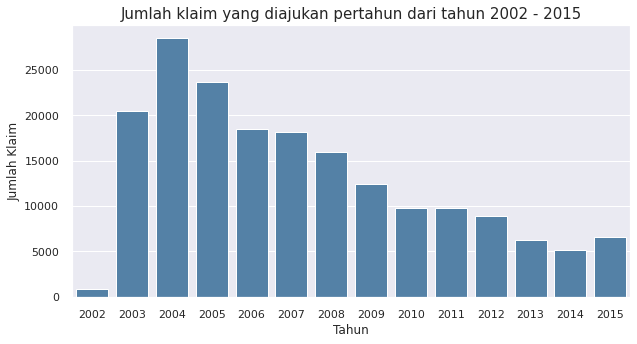

In [90]:
# Membuat barplot jumlah pengajuan klaim pertahun
plt.figure(figsize=(10,5))
# plt.bar(df['incident_year'].value_counts().index, df['incident_year'].value_counts().values)
sns.barplot(df['year_received'].value_counts().index, df['year_received'].value_counts().values, color = 'steelblue')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan pertahun dari tahun 2002 - 2015', size = 15)
plt.xticks(range(14), ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
plt.show()

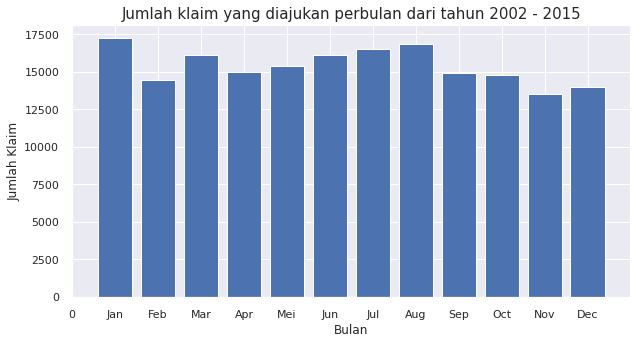

In [91]:
# Membuat barplot jumlah pengajuan klaim perbulan
plt.figure(figsize=(10,5))
plt.bar(df['month_received'].value_counts().index, df['month_received'].value_counts().values)
# sns.barplot(df['incident_month'].value_counts().index, df['incident_month'].value_counts().values, color = 'steelblue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan perbulan dari tahun 2002 - 2015', size = 15)
plt.xticks(range(13), [0, 'Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

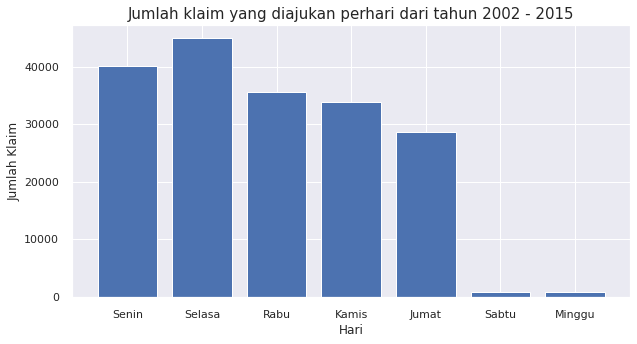

In [92]:
# Membuat barplot jumlah pengajuan klaim perhari
plt.figure(figsize=(10,5))
plt.bar(df['day_received'].value_counts().index, df['day_received'].value_counts().values)
# sns.barplot(df['incident_day'].value_counts().index, df['incident_day'].value_counts().values, color = 'steelblue')
plt.xlabel('Hari')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan perhari dari tahun 2002 - 2015', size = 15)
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

Dari hasil analisis diatas dan menghasilkan beberapa grafik, dapat digunakan untuk menjawab beberapa pertanyaan berikut:

1. Pada tahun berapa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?
  * Klaim yang diajukan ke TSA dari tahun ke tahun kurang lebih mengalami penurunan (kecuali tahun 2002 ke 2004 dan 20014 ke 2015) hal ini menandakan bahwa TSA selaku badan yang mengurusi keselamatan dan keamanan transportasi khususnya penerbangan telah menjalankan tugasnya dengan baik dengan bukti laporan tiap tahun klaim yang diajukan mengalami penurunan. Dengan begitu berarti keamanan dan keselamatan penerbangan di US menjadi semakin baik.
  * Pada tahun 2002 TSA yang baru didirikan 1 tahun belum mendapatkan banyak laporan dikarenakan belum adanya pengetahuan masyarakat USA yang mengetahui proses klaim kepada TSA sehingga hanya sedikit klaim yang masuk ke TSA.
  * Namun pada tahun selanjutnya 2003 dn 2004, dikarenakan masyarakat sudah mengetahui terkait TSA, klaim yang masuk ke TSA meningkat secara signifikan dan selanjutnya mengalami penurunan kecuali tahun 2015 yang mengalami kenaikan.
  * Tahun 2004 adalah tahun tertinggi dimana TSA menerima pengajuan klaim.



2. Pada bulan apa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?
  * Pengajuan klaim kepada TSA paling banyak terjadi pada bulan **Agustus** dan **Januari**.
  * Pada bulan **Agustus** penyebab laporan kepada TSA meningkat dikarenakan adanya Summer Vacation dimana terdapat libur panjang akhir sekolah dimana banyak yang melakukan liburan sehingga jumlah penerbangan di USA mengalami peningkatan. Hal inilah yang menyebabkan pengajuan klaim TSA meningkat.
  * Begitu juga pada bulan **Januari** terdapat banyak sekali hari libur pada bulan desember dan januari di USA mulai dari hari natal, thanksgiviing, sampai tahun baru. Hal tersebut dapat meningkatkan jumlah penerbangan yang signifikan di USA sehingga dapat menyebabkan peningkatan klaim yang diajukan kepada TSA.
  * Laporan klaim diajukan kebanyakan pada saat selesai masa vacation, hal itulah yang menyebabkan  lonjakan jumlah klaim di bulan **Agustus** dan **Januari** bukan di bulan **Juli** dan **Desember**..



3. pada hari apa TSA mendapatkan laporan terbanyak? dan apa penyebabnya?
  * Untuk pengajuan klaim perhari paling banyak berada di hari **Weekday** ini disebabkan banyak kebanyakan kantor perwakilan TSA yang ada dibandara hanya memiliki waktu operational senin - jumat, hanya sedikit kantor yang buka pada **weekend**. Ini menjadi perhatian sendiri karena terdapat  orang yang melakukan perjalanan pada weekend untuk berlibur sehingga dapat menyebabkan naiknya angka klaim yang diajukan kepada TSA.

## Data analisis berdasarkan lokasi dan status
Pada analisis ini akan dilihat pengaruh lokasi kejadian terhadap klaim yang diajukan. Proses ini akan menganalisis kolom `claim_site`, `claim_type`, `close_amount` dan `status` sehingga kita dapat menjawab beberapa pertanyaan berikut ini.

1. Berapa jumlah total klaim yang disetujui oleh TSA untuk diganti secara penuh? dan berapa persentasenya terhadap semua klaim?
2. Dimana paling banyak terjadinya insiden kejadian tidak menyenangkan yang dialamin oleh penumpang?
3. Berapa persentase klaim yang disetujui oleh TSA diganti secara penuh berdasarkan lokasi kejadian?

In [93]:
# Menghitung jumlah data yang dimiliki data unik pada kolom status
df['status'].value_counts()

Denied      98835
Approved    46985
Settled     33353
Canceled     5778
Name: status, dtype: int64

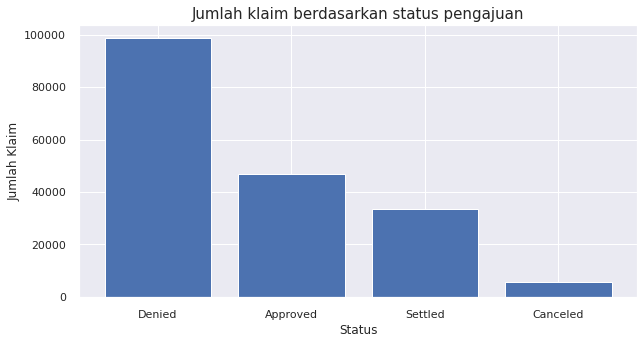

In [94]:
# membuat barplot jumlah klaim berdasarkan status pengajuan
plt.figure(figsize=(10,5))
plt.bar(df['status'].value_counts().index, df['status'].value_counts().values)
plt.xlabel('Status')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim berdasarkan status pengajuan', size = 15)
plt.show()

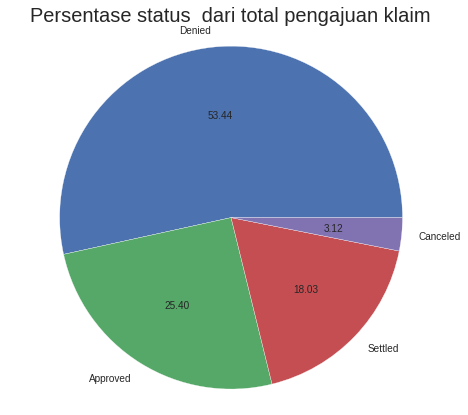

In [95]:
# membuat pie plot jumlah persentase berdasarkan status pengajuan
plt.style.use('seaborn')
plt.figure(figsize = (8,7))
plt.pie(df['status'].value_counts(),
        labels = df['status'].value_counts().index,
        autopct = '%.2f',
        explode = (0,0,0,0))
plt.axis('equal')

plt.title('Persentase status  dari total pengajuan klaim', size = 20)
plt.show()

In [96]:
# Menghitung jumlah data yang dimiliki data unik pada kolom claim_site
df['claim_site'].value_counts()

Checked Baggage    146787
Checkpoint          35871
Other                1799
Unknown               484
Bus Station            10
Name: claim_site, dtype: int64

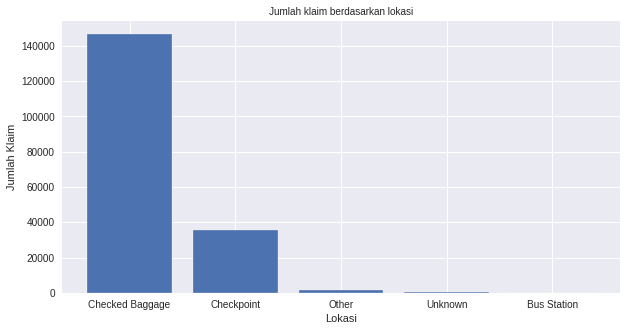

In [97]:
# membuat barplot jumlah klaim berdasarkan status lokasi klaim
plt.figure(figsize=(10,5))
plt.bar(df['claim_site'].value_counts().index, df['claim_site'].value_counts().values)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim berdasarkan lokasi', size = 10)
plt.show()

In [98]:
# Membuat dataframe baru terkait jumlah pengajuan klaim pertahun pada setiap lokasi
df_claim_site = df.pivot_table(index='year_received', columns='claim_site', aggfunc='size', fill_value=0).reset_index()

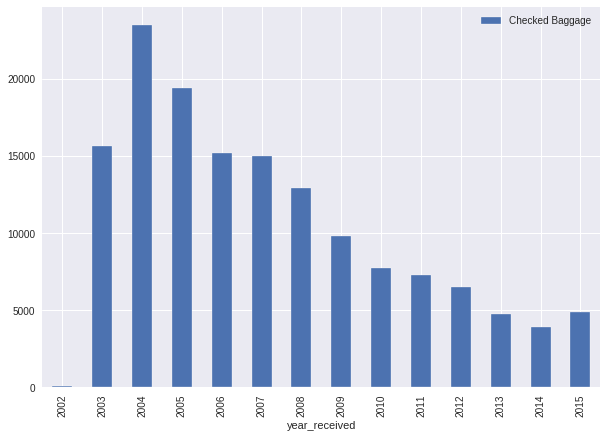

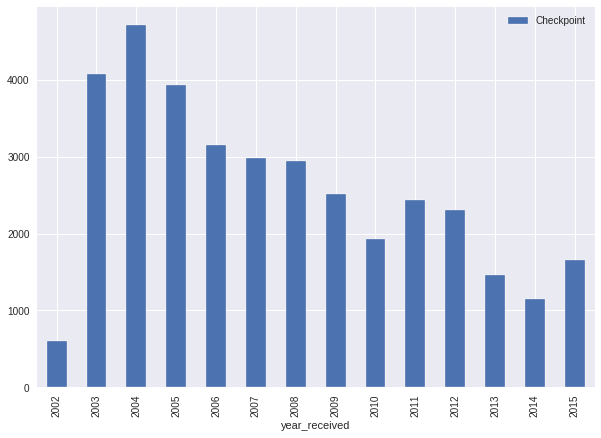

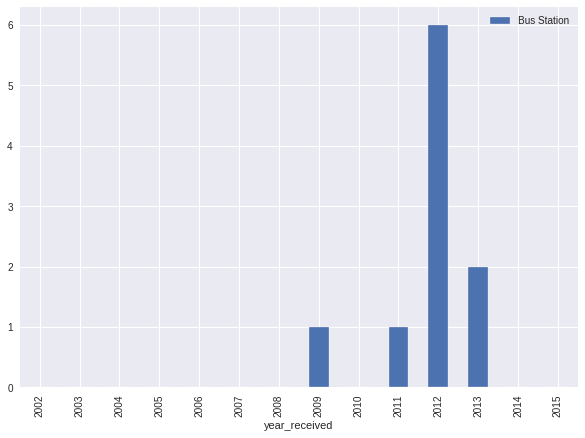

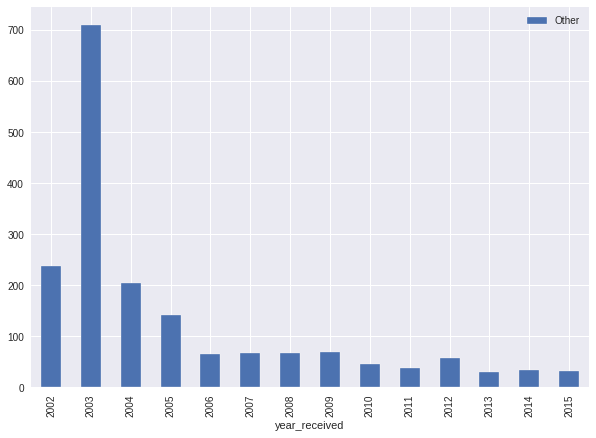

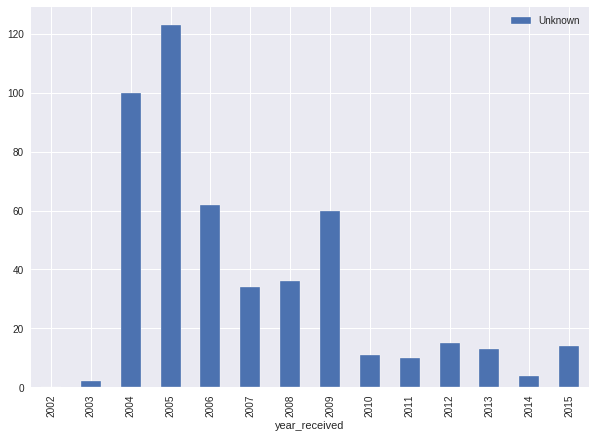

In [99]:
# Membuat bar plot total klaim untuk setiap lokasi pertahun
# Dibuat setiap barplot bukan langsung dalam 1 barplot karena selisih pengajuan klaim nya terlalu jauh terutama pada Checked Baggage dan	Checkpoint
for i in ["Checked Baggage", 'Checkpoint',"Bus Station", 'Other', 'Unknown']:
  df_claim_site.plot(x="year_received", y=i, kind="bar", figsize=(10,7))

In [100]:
# Membuat dataframe baru terkait jumlah pengajuan klaim berdasarkan status pada setiap lokasi
df_claim_site_status = df.pivot_table(index='status', columns='claim_site', aggfunc='size', fill_value=0)

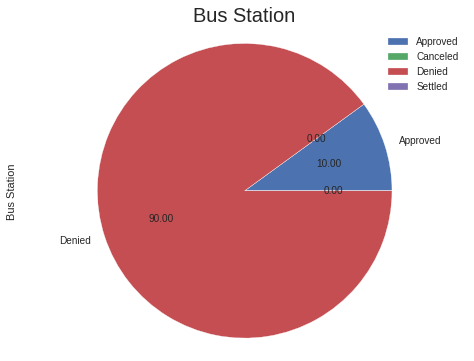

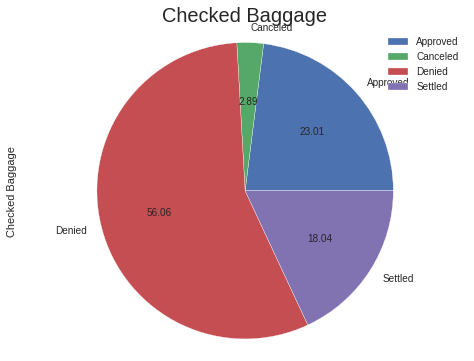

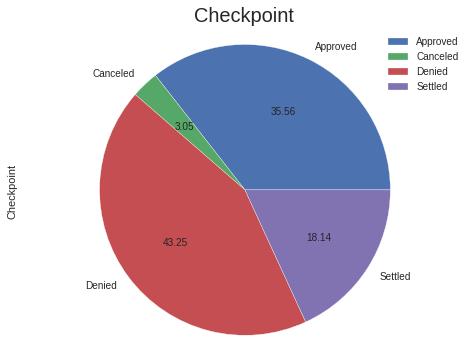

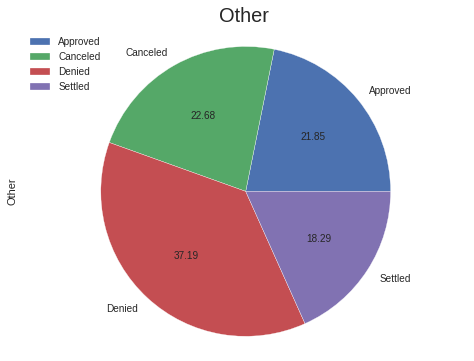

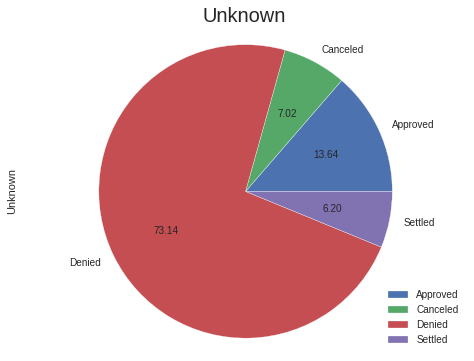

In [101]:
# Membuat pie plot total klaim untuk setiap lokasi berdasarkan status klaim
for i in ['Bus Station',	'Checked Baggage',	'Checkpoint',	'Other',	'Unknown']:
  df_claim_site_status.plot.pie(y = i,
                    figsize = (8,6),
                    autopct = '%.2f')
  plt.axis('equal')
  plt.title(i, size = 20)
  plt.show()

Dari hasil analisis diatas dan menghasilkan beberapa grafik, grafik tersebut dapat digunakan untuk menjawab beberapa pertanyaan berikut:

1. Berapa jumlah total klaim yang disetujui oleh TSA untuk diganti secara penuh? dan berapa persentasenya terhadap semua klaim?
 * Total jumlah klaiim yang disetujui oleh TSA untuk diganti secara penuh adalah 46.985 klaim atau 25.40%. Sedangkan untuk keseluruhan klaim yang ditolak sebesar 98.835 klaim atau sebesar 53.44%, Untuk yang diganti sebagian sebesar 33.353 klaim atau sekitar 18.03%, dan total yang ditarik kembalik adalah sebesar 5.778 klaim atau sekitar 3.12%.



2. Dimana paling banyak terjadinya insiden kejadian tidak menyenangkan yang dialamin oleh penumpang?
 * Untuk kejadian tidak menyenangkan yang dialami oleh penumpang paling banyak terjadi di bagian Checked Baggage sebesar 146.787 pengajuan klaim, disusul oleh bagian Checkpoint sebesar 35.871 klaim, Other sebesar 1.799 klaim, Unknown sebesar 484 klaim, dan Bus Station sebesar 10 klaim.
 * Checked Baggage merupakan yang paling sering menjadi lokasi klaim, namun dari grafik diatas juga bisa dilihat bahwa hampir setiap tahun mengalami penurunan (kecuali tahun 2002, 2003, dan sedikit kenaikan ditahun 2015) hal ini menunjukkan bahwa keamanan dan kenyamanan penumpang semakin meningkat.
 * Checkpoin yang merupakan peringkat kedua lokasi yang sering menjadi tempat klaim juga menunjukkan penurunan  setiap tahun (kecuali tahun-tahun awal TSA) namun berbeda dengan Checked Baggage, lokasi checkpoint beberapa kali mengalami kenaikan dan penurunannya tidak secepat Checked Baggage untuk tiap tahunnya.
 * Untuk lokasi klaim yang diajukan tidak beraturan sehingga dapat dikatakan bahwa lokasi lain ketika mendapatkan laporan klaim menunjukkan bahwa klaim tersebut merupakan kejadian isidentil.



3. Berapa persentase klaim yang ditolak  dan diganti secara penuh berdasarkan lokasi kejadian?
 * Secara menyeluruh dari total klaim pada setiap kejadia lokasi hanya lokasi Checkpoint dan Other yang memiliki persentase klaim ditolak (denied) dibawah 50% yaitu 43.25% dan 37.19%. Sedangkan yang lain Bus station 90%, Checked Baggage 56.06%,dan Unknown sebesar 73.14%. Ini menandakan bahwa klaim yang diajukan memang banyak yang tidak dapat diganti dengan alasan tertentu.

 * Sedangkan untuk klaim yang disetujui penuh yaitu Bus Station 10%, Checked Baggage 23,01%, Checkpoint 35.56%, Other 21.85%, dan Unknown 13.64%. 

## Data analisis berdasarkan nominal yang disetujui
Pada analisis ini akan dilihat pengaruh nominal terhadap klaim yang diajukan. Proses ini akan menganalisis kolom `claim_amount`, `close_amount`, dan `status` sehingga kita dapat menjawab beberapa pertanyaan berikut ini.

1. Berapa persebaran data terhadap klaim yang disetujui baik diganti secara penuh atau sebagian dari pengajuan klaim?
2. Apakah nominal yang diajukan penumpang berdampak pada total nominal yang diterima oleh penumpang? (kalau nominal yang diajukan besar (>=5000 dollar), apakah akan disetujui lebih dari 50% dari pengajuan)

In [102]:
# Membuat tabel baru yang hanya berisi klaim dengan status Settled dan Approved
df_settle = df.loc[(df['status'] == 'Settled')]
df_full = df.loc[(df['status'] == 'Approved')]

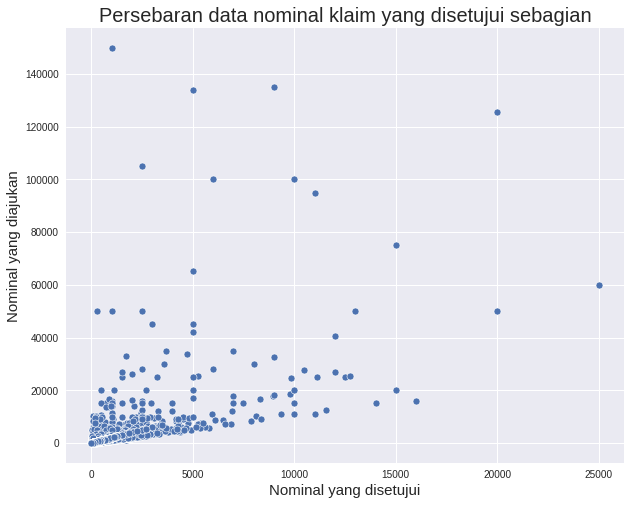

In [103]:
# membuat scatter plot terkait persebaran data nominal pengajuan dan nominal disetujui dengan status settled
sns.scatterplot(data = df_settle, x = 'close_amount', y = 'claim_amount')
plt.gcf().set_size_inches(10, 8)
plt.title('Persebaran data nominal klaim yang disetujui sebagian', size = 20)
plt.xlabel('Nominal yang disetujui', size = 15)
plt.ylabel('Nominal yang diajukan', size = 15)
plt.show()

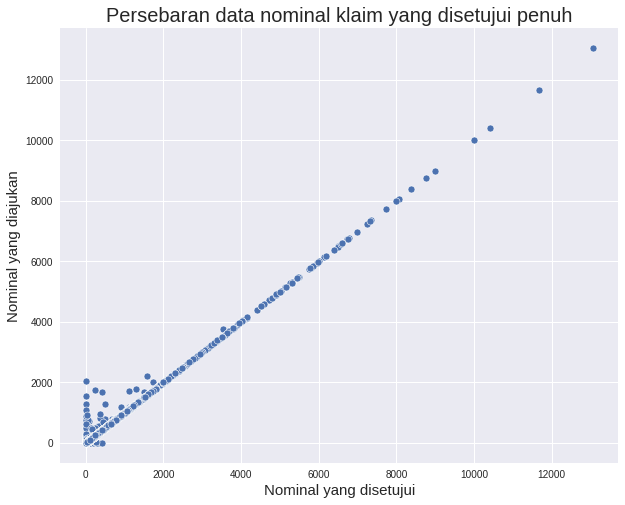

In [104]:
# membuat scatter plot terkait persebaran data nominal pengajuan dan nominal disetujui dengan status approved
sns.scatterplot(data = df_full, x = 'close_amount', y = 'claim_amount')
plt.gcf().set_size_inches(10, 8)
plt.title('Persebaran data nominal klaim yang disetujui penuh', size = 20)
plt.xlabel('Nominal yang disetujui', size = 15)
plt.ylabel('Nominal yang diajukan', size = 15)
plt.show()

In [105]:
# Membuat kolom baru untuk pengkategorian nominal
# kolom cat_nominal berisi nominal besar (1) dan nominal kecil (0), nominal kecil adalah pengajuan klaim yang dibawah 5000 dollar
# kolom hasil berisi jawaban apakah nominal yang disetujui sebagian (settle) diatas 50% nominal pengajuan (claim_amount) atau tidak
def cat_nominal(i):
    if i < 5000:
        return 0
    else:
        return 1
 
df_settle['cat_nominal'] = df_settle['close_amount'].map(cat_nominal)

df_settle.loc[df_settle['close_amount'] <= (df_settle['claim_amount']/2), 'hasil'] = 'False'
df_settle.loc[df_settle['close_amount'] > (df_settle['claim_amount']/2), 'hasil'] = 'True'
df_settle.head()

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition,day_received,month_received,year_received,cat_nominal,hasil
1,2004-01-16,2002-02-02,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,100.00,Settled,50.00,Settle,4,1,2004,0,False
2,2003-11-26,2002-02-04,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,Settle,2,11,2003,0,True
5,2005-02-17,2002-02-18,Akron-Canton Regional,Air Tran Airlines(do not use),Property Loss,Checked Baggage,459.01,Settled,227.00,Settle,3,2,2005,0,False
18,2002-07-24,2002-07-10,Louisville International,Delta Air Lines,Property Loss,Checkpoint,600.00,Settled,337.40,Settle,2,7,2002,0,True
19,2002-08-08,2002-07-26,Unknown,Unknown,Unknown,Other,160.00,Settled,149.08,Settle,3,8,2002,0,True


In [106]:
# cek distribusi kolom cat_nominal
from scipy.stats import normaltest
stats, pval=normaltest(df_settle['cat_nominal'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [107]:
# uji statistik, apakah kategori nominal yang diterima penumpang (kolom cat_nominal) berdampak pada total nominal yang diterima oleh penumpang 
# kategoti nominal (cat_nominal), 0 adalah pengajuan klaim <5000 dollar, 1 adalah pengajuan klaim >=5000 dollar
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df_settle[df_settle['hasil']==i]['cat_nominal'] for i in df_settle['hasil'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Dari hasil analisis diatas dan menghasilkan beberapa grafik, grafik tersebut dapat digunakan untuk menjawab beberapa pertanyaan berikut:



1. Berapa persebaran data terhadap klaim yang disetujui baik diganti secara penuh atau sebagian dari pengajuan klaim?
  * Dari grafik yang diperlihatkan dengan grafik scatter plot memperihatkan bahwan nominal yang disetujui hanya sebagian berada disekitar 100 sampai 15.000 dollar.
  * Sedangkan pada nominal yang disetujui full menunjukkan angka yang sama dengan pengajuan, namun ada beberapa pengajuan yang masuk dalam Approve in full namun nominal yang diterima tidak sesuai dengan pengajuan.



2. Apakah nominal yang diajukan penumpang berdampak pada total nominal yang diterima oleh penumpang? (kalau nominal yang diajukan besar (>=5000 dollar), apakah akan disetujui lebih dari 50% dari pengajuan)
  * Berdasarkan uji statistik yang telah dilakukan, ternyata nominal yang diajukan oleh penumpang baik itu jumlahnya besar (lebih dari sama dengan 5.000) atau kecil (kurang dari 5.000) tidak mempengaruhi jumlah nominal yang disetujui (apakah lebih dari 50% pengajuan atau tidak) oleh TSA.


## Data analisis berdasarkan tipe klaim
Pada analisis ini akan dilihat pengaruh tipe pengajuan terhadap klaim yang diajukan. Proses ini akan menganalisis kolom `claim_type`, `status`, dan `close_amount` sehingga kita dapat menjawab beberapa pertanyaan berikut ini.

1. Berapa banyak total klaim yang diajukan oleh penumpang untuk setiap tipe klaim?
2. Berapa banyak total status klaim untuk setiap tipe klaim yang diajukan oleh penumpang?
3. Berapa total nominal yang dikeluarkan TSA untuk setiap tipe pengajuan?

In [108]:
df['claim_type'].value_counts()

Property Loss      107187
Property Damage     69562
Unknown              6131
Personal Injury       865
Employee Loss         456
Passenger Theft       454
Other                 278
Complaint              14
Wrongful Death          3
Bus Terminal            1
Name: claim_type, dtype: int64

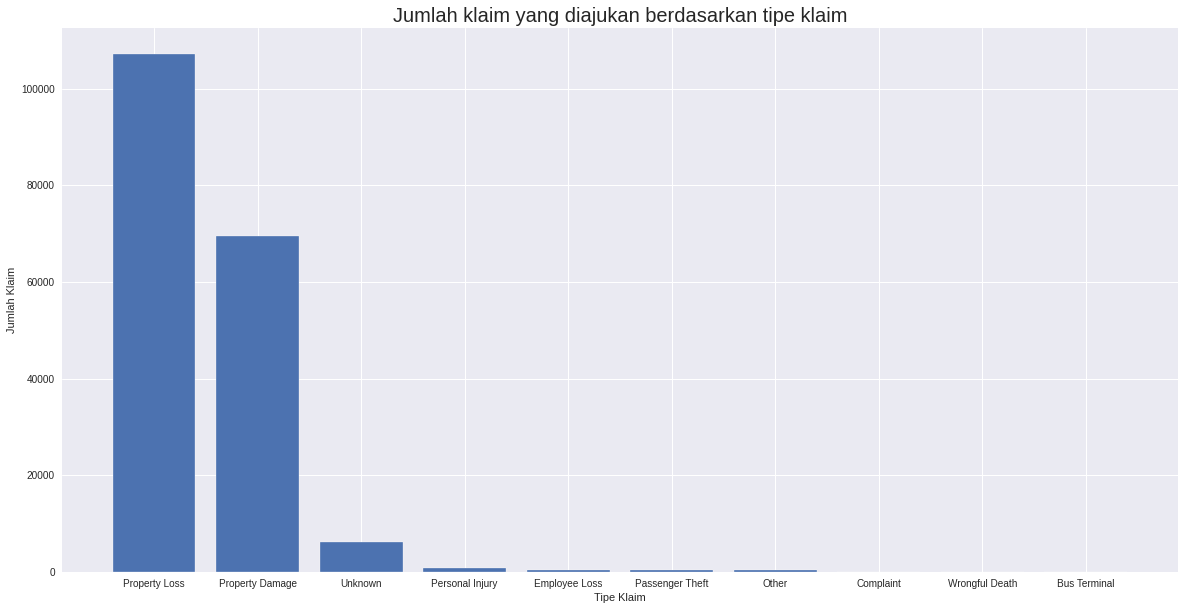

In [109]:
# Membuat bar plot jumlah klaim pada setiap tipe klaim
plt.figure(figsize=(20,10))
plt.bar(df['claim_type'].value_counts().index, df['claim_type'].value_counts().values)
plt.xlabel('Tipe Klaim')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan berdasarkan tipe klaim', size = 20)
plt.show()

In [110]:
# membuat tabel baru untuk menghitung jumlah klaim disetiap tipe klaim berdasarkan status
df_claim_type = df.pivot_table(index='status', columns='claim_type', aggfunc='size', fill_value=0)
df_claim_type

claim_type,Bus Terminal,Complaint,Employee Loss,Other,Passenger Theft,Personal Injury,Property Damage,Property Loss,Unknown,Wrongful Death
status,,,,,,,,,,
Approved,0,5,179,153,141,91,21506,23321,1589,0
Canceled,0,0,26,22,26,38,1155,3925,586,0
Denied,0,9,155,55,175,590,32428,63439,1981,3
Settled,1,0,96,48,112,146,14473,16502,1975,0


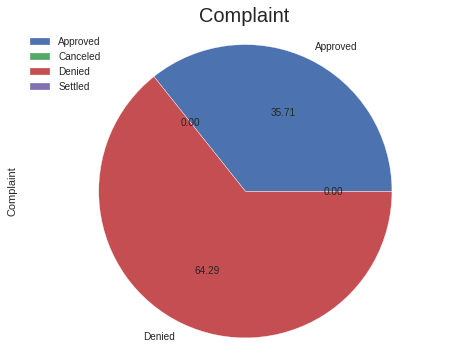

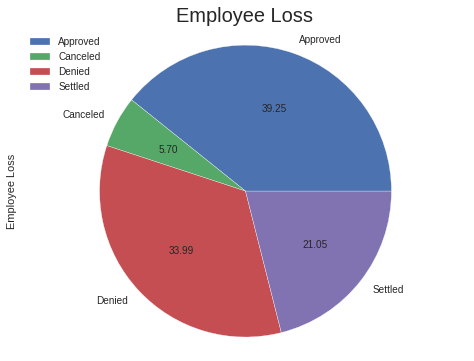

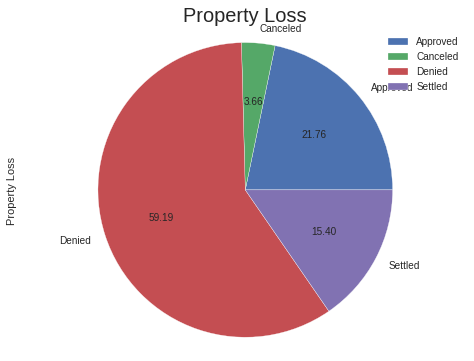

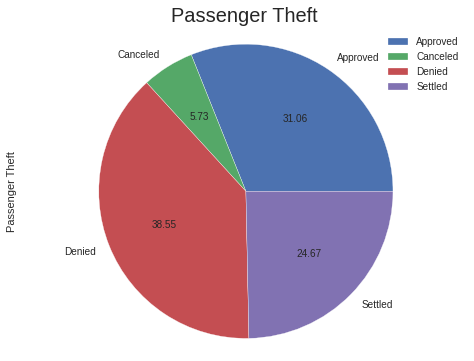

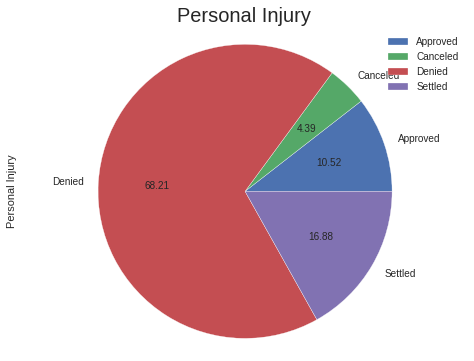

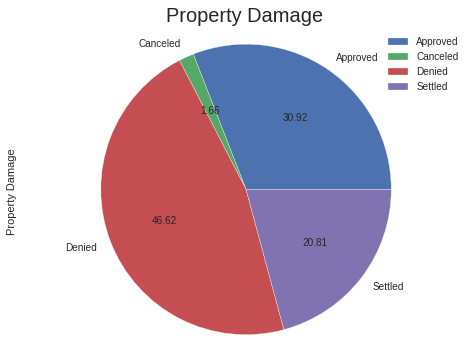

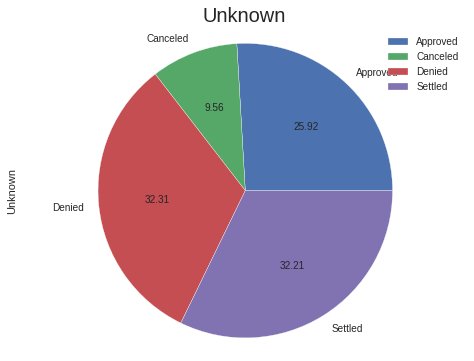

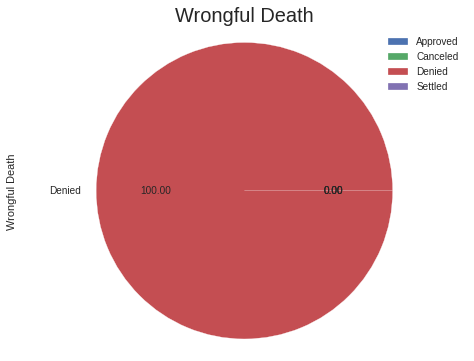

In [111]:
for i in ['Complaint','Employee Loss','Property Loss',
          'Passenger Theft','Personal Injury','Property Damage','Unknown','Wrongful Death']:
  df_claim_type.plot.pie(y = i,
                    figsize = (8,6),
                    autopct = '%.2f')
  plt.axis('equal')
  plt.title(i, size = 20)
  plt.show()

In [122]:
# membuat tabel baru untuk menghitung jumlah klaim disetiap tipe klaim berdasarkan status
df_nominal_type = df.pivot_table(values = 'close_amount', index='claim_type',  aggfunc='sum', fill_value=0).reset_index()
df_nominal_type

,claim_type,close_amount
0,Bus Terminal,70.000
1,Complaint,348.350
2,Employee Loss,48525.000
3,Other,302670.270
4,Passenger Theft,62856.000
5,Personal Injury,539801.505
6,Property Damage,6524111.035
7,Property Loss,7372317.730
8,Unknown,785144.280
9,Wrongful Death,0.000


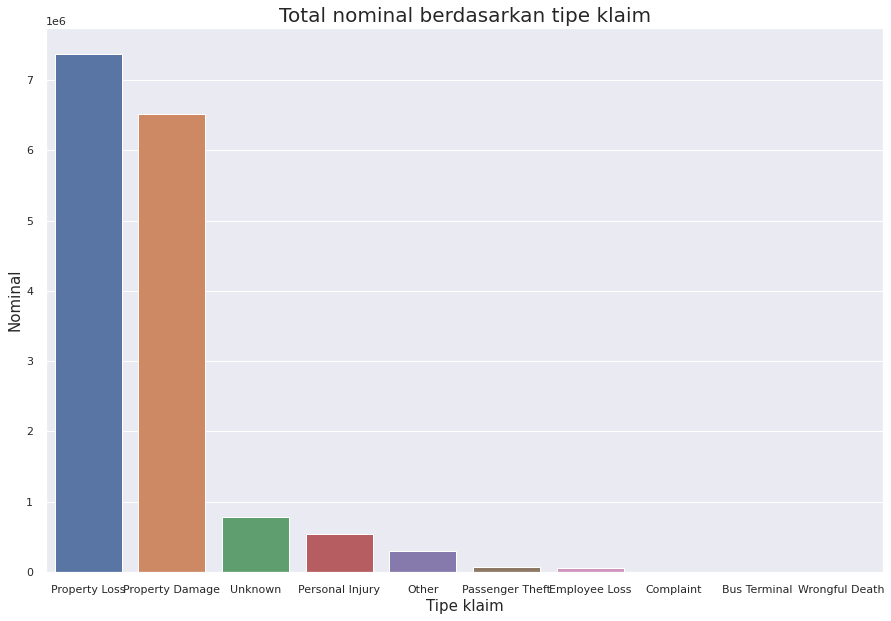

In [119]:
sns.barplot(x='claim_type',y='close_amount', data=df_nominal_type,
            order=df_nominal_type.sort_values('close_amount',ascending = False).claim_type)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Total nominal berdasarkan tipe klaim', size = 20)
plt.xlabel('Tipe klaim', size = 15)
plt.ylabel('Nominal', size = 15)
plt.show()

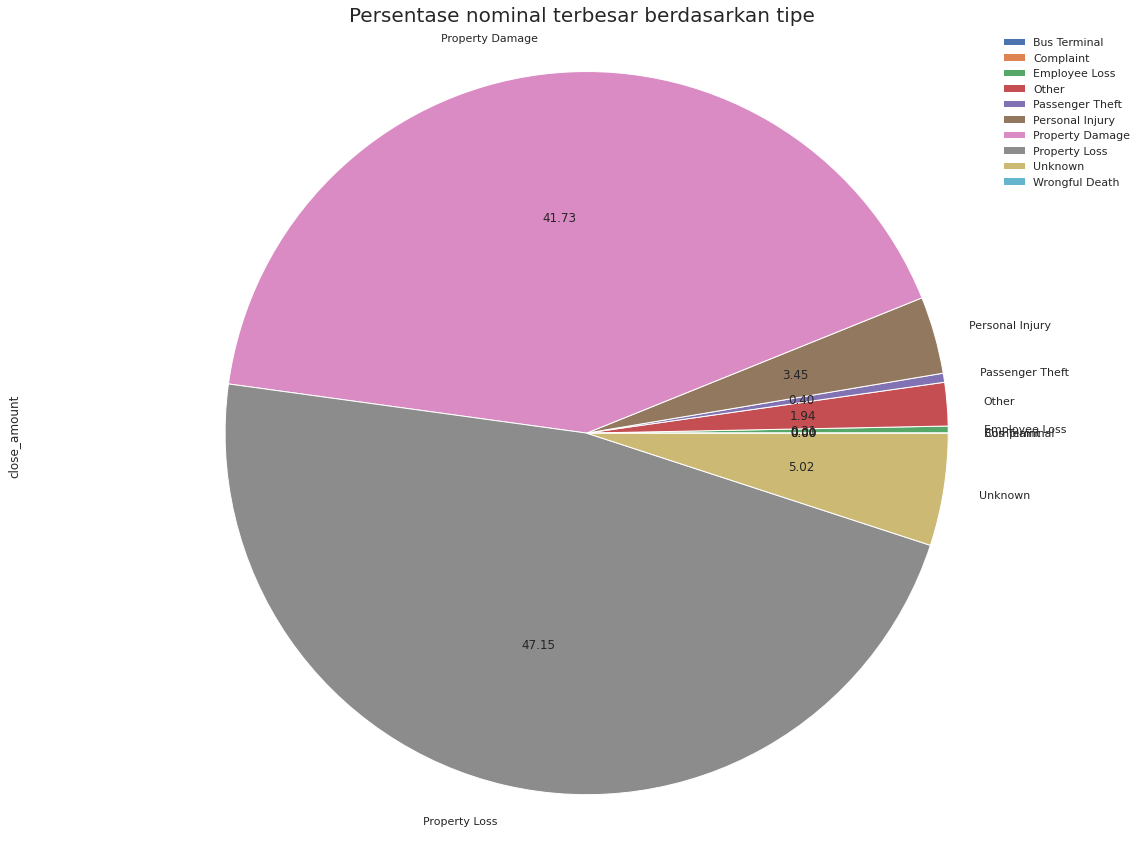

In [121]:
df_nominal_type.plot.pie(y = 'close_amount',
                         x = 'claim_type',
                  figsize = (20,15),
                  autopct = '%.2f')
plt.axis('equal')
plt.title('Persentase nominal terbesar berdasarkan tipe', size = 20)
plt.show()

Dari hasil analisis diatas dan menghasilkan beberapa grafik, grafik tersebut dapat digunakan untuk menjawab beberapa pertanyaan berikut:

1. Berapa banyak total klaim yang diajukan oleh penumpang untuk setiap tipe klaim?
  * Dari analisis diatas Property Loss adalah yang paling sering terjadi dengan klaim sebanyak 107.187 klaim, selanjutnya ada Property Damage sebanyak 69.562 klaim, sedangkan sisanya yaitu Unknown 6.31 klaim, Personal Injury 865 klaim,Employee Loss 456 klaim, Passenger Theft 454 klaim, Other 278 klaim, Complaint 14 klaim, Wrongful Death 3 klaim.



2. Berapa banyak total status klaim untuk setiap tipe klaim yang diajukan oleh penumpang?
  * Dari analisis diatas didapatkan data berikut ini:
    * **Complaint**, 35.71% Approved dan 64.29% Denied
    * **Employee Loss**, 39.25% Approved, 33.99% Denied, 21.05% Settled, dan 5.70% Cenceled
    * **Property Loss**, 21.76% Approved, 59.19% Denied, 25.39% Settled, dan 3.66% Cenceled
    * **Passenger Theft**, 31.06% Approved, 38.55% Denied, 24.67% Settled, dan 5.73% Cenceled
    * **Personal Injury**, 9.39% Approved, 68.94% Denied, 15.89% Settled, dan 5.78% Cenceled
    * **Property Damage**, 30.91% Approved, 46.62% Denied, 20.81% Settled, dan 1.66% Cenceled
    * **Unknown**, 25.90% Approved, 32.31% Denied, 32.20% Settled, dan 9.59% Cenceled
    * **Wrongful Death**, 100% Denied



3. Berapa total nominal yang dikeluarkan TSA untuk setiap tipe pengajuan?
  *Dari analisis diatas kita melihat besaran dana yang dikeluarkan oleh TSA selama tahun 2002 sampai 2015 kurang lebih sekitar:
    * **Property Loss**	7.372.317.730 dolar
    * **Property Damage**	6.524.111.035 dolar
    * **Personal Injury**	539.801.505 dolar
    * **Unknown**	785.144.280 dolar
    * **Other**	302.670.270 dolar
    * **Passenger Theft**	62.856.000 dolar
    * **Employee Loss**	48.525.000 dolar
    * **Complaint**	348.350 dolar
    * **Bus Terminal**	70.000 dolar
    * **Wrongful Death**	0

## Data analisis berdasarkan interval insiden ke laporan klaim
Pada analisis ini akan dilihat pengaruh tipe pengajuan terhadap klaim yang diajukan. Proses ini akan menganalisis kolom `incident_date`, `status`, dan `date_received` sehingga kita dapat menjawab beberapa pertanyaan berikut ini.

1. Apakah interval tanggal insiden dan tanggal laporan diterima berpengaruh ke status klaim?

In [115]:
# Menambah kolom baru interval
df['interval'] = (df['date_received'] - df['incident_date']).dt.days
df.head()

,date_received,incident_date,airport_name,airline,claim_type,claim_site,claim_amount,status,close_amount,disposition,day_received,month_received,year_received,interval
0,2002-12-12,2002-01-04,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00,Approve in Full,3,12,2002,342
1,2004-01-16,2002-02-02,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,100.00,Settled,50.00,Settle,4,1,2004,713
2,2003-11-26,2002-02-04,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,Settle,2,11,2003,660
3,2003-01-06,2002-02-07,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00,Approve in Full,0,1,2003,333
4,2005-02-05,2002-02-18,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79,Approve in Full,5,2,2005,1083


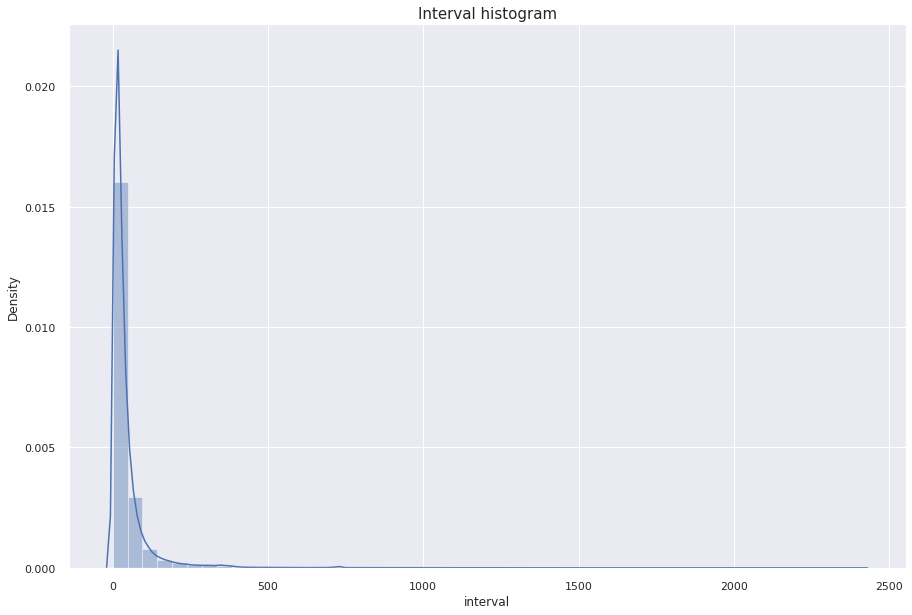

In [116]:
# Membuat histogram terkait interval pengajuan
sns.distplot(df['interval'])
plt.title('Interval histogram', size = 15)
plt.show()

In [117]:
# cek distribusi kolom interval
from scipy.stats import normaltest
stats, pval=normaltest(df['interval'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [118]:
# uji statistik, Apakah interval tanggal insiden dan tanggal laporan diterima berpengaruh ke status klaim?
# karena distribusi data tidak normal dan populasi lebih dari 2, gunakan kruskal walis
from scipy.stats import kruskal
stats,pval=kruskal(*[df[df['status']==i]['interval'] for i in df['status'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Dari hasil analisis diatas dan menghasilkan beberapa grafik, grafik tersebut dapat digunakan untuk menjawab beberapa pertanyaan berikut:



1. Apakah interval tanggal insiden dan tanggal laporan diterima berpengaruh ke status klaim?
  * Dari hasil uji statistik sebelumnya bisa disimpulkan bahwa ternyata memang ada pengaruh interval (jarak antara tanggal insiden dan tanggal laporan diterima) terhadap status dari pengajuan klaim tersebut apakah nanti diterima, ditolak dan lain sebagainya.

# Kesimpulan Dan Rekomendasi

## Kesimpulan

Dari hasil analisis yang telah dilakukan, kita bisa membuat kesimpulan yang dapat digunakan untuk membuat rekomendasi sesuai dengan pernyataan masalah sebelumnya.



* TSA selalu berhasil menurunkan jumlah laporan klaim dari awal-awal tahun berdirinya TSA, namun pada tahun 2015 jumlah klaim yang diajukan meningkat dari tahun 2014.
* TSA menerima pengajuan laporan klaim terbanyak berdasarkan bulan terjadi di bulan **Agustus** dan **Januari**.
* TSA menerima pengajuan laporan klaim terbanyak berdasarkan hari terjadi di hari **Senin sampai Jumat**.
* Dari 184.951 data yang dimiliki terbagi menjadi 4 status klaim yaitu:
  * **Denied** ----------- 98.835 (53.45%)
  * **Approved**-------- 46.985 (25.39%)
  * **Settled**----------- 33.353 (18.03%)
  * **Canceled**-------- 5.778 (3.13%)
* Kejadin tidak menyenangkan yang dialami penumpang berdasarkan lokasi klaim:
  * **Checked Baggage**----- 146.787 klaim
  * **Checkpoint**---------------- 35.871 klaim
  * **Other**------------------------- 1.799 klaim
  * **Unknown**------------------- 489 klaim
  * **Bus Station**--------------- 10 klaim
* **Checked Baggage dan Checkpoint** merupakan yang paling sering menjadi lokasi klaim.
* Untuk pengajuan klaim yang disetujui sebagian persebaran nominal yang disetujui berada disekitar 100 sampai 20000 dollar.
* Sedangkan apabila nominal yang diajukan besar (>=5000 dollar) ternyata **tidak dapat mempengaruhi jumlah nominal yang disetujui dapat lebih dari 50%** oleh TSA.
* Total klaim yang diajukan oleh penumpang untuk setiap tipe klaim:
  * **Property Loss** -------------- 107.187 klaim
  * **Property Damage** -------- 69.562 klaim
  * **Unknown** --------------------- 6.131 klaim
  * **Personal Injury** ------------ 865 klaim
  * **Employee Loss** ------------ 456 klaim
  * **Passenger Theft** ---------- 454 klaim
  * **Other** ---------------------------- 278 klaim
  * **Complaint** --------------------- 14 klaim
  * **Wrongful Death** ------------- 3 klaim
* Total status klaim untuk setiap tipe klaim yang diajukan oleh penumpang:
  * **Complaint**, 35.71% Approved dan 64.29% Denied
  * **Employee Loss**, 39.25% Approved, 33.99% Denied, 21.05% Settled, dan 5.70% Cenceled
  * **Property Loss**, 21.75% Approved, 59.19% Denied, 25.39% Settled, dan 3.66% Cenceled
  * **Passenger Theft**, 31.06% Approved, 38.55% Denied, 24.67% Settled, dan 5.73% Cenceled
  * **Personal Injury**, 9.39% Approved, 68.94% Denied, 15.89% Settled, dan 5.78% Cenceled
  * **Property Damage**, 30.91% Approved, 46.62% Denied, 20.81% Settled, dan 1.66% Cenceled
  * **Unknown**, 25.90% Approved, 32.31% Denied, 32.20% Settled, dan 9.59% Cenceled
  * **Wrongful Death**, 100% Denied
* Total nominal yang dikeluarkan TSA untuk setiap tipe pengajuan:
  * **Property Loss**	7.372.317.730 dolar
  * **Property Damage**	6.524.111.035 dolar
  * **Personal Injury**	539.801.505 dolar
  * **Unknown**	785.144.280 dolar
  * **Other**	302.670.270 dolar
  * **Passenger Theft**	62.856.000 dolar
  * **Employee Loss**	48.525.000 dolar
  * **Complaint**	348.350 dolar
  * **Bus Terminal**	70.000 dolar
  * **Wrongful Death**	0 dolar
* Interval tanggal insiden dan tanggal laporan diterima ternyata **ada pengaruh terhadap status** dari pengajuan klaim tersebut apakah nanti diterima, ditolak dan lain sebagainya.

## Rekomendasi

1. Berdasarkan waktu, TSA harus menginformasikan setiap bandara untuk meningkatkan keamanan dan keselamatan dalam menjaga keamanan, keselamatan, dan kenyamanan penumpang  pada bulan **Desember - Januari** karena banyak libur nasional di USA dan **Juli - Agustus** karena ada summer vacation untuk anak-anak sekolah sehingga meningkatkan perjalanan di seluruh negara bagian.
2. **Menambahkan waktu operasional TSA di weekend** ke seluruh bandara di USA. Karena hanya sedikit bandara yang membuka operasional TSA di weekend. Padahal pada weekend juga terjadi banyak sekali perjalanan sehingga klaim akan lebih cepat terdeteksi dan dapat segera ditangani dengan cepat.
3. **Melakukan edukasi lebih lanjut terkait klaim-klaim di TSA ke masyarakat luas**. Dari data sebelumnya, melihat lebih dari 50% pengajuan klaim ditolak dapat menandakan bahwa masyarakat tidak mengetahui apa yang dapat diklaim dan apa yang tidak dapat diklaim. Sehingga dengan adanya edukasi lebih lanjut masyarakat dapat memilah sendiri sebelum melakukan pengajuan klaim.
4. **Meningkatkan keamanan dan keselamatan di bagian Checked Baggage dan Checkpoint**. Dikarenakan lebih dari 70% atau sekitar 180 ribu pengajuan klaim dilakukan dilokasi tersebut sehingga menandakan bahwa keamanan dan keselamatan dibagian tersebut kurang.
5. **Memberikan alasan kenapa klaim tidak bisa disetujui secara penuh** karena tidak semua klaim dapat disetujui secara penuh. Kemudian **memberikan maksimal nominal yang dapat disetujui sebagian** sesuai dengan kondisi pengajuan klaim yang diajukan penumpang.
6. **Membuat rentang kondisi berapa persen nominal klaim yang dapat disetujui** mulai 25%, 50%, 75%, 100% sehingga pembayaran klaim lebih teratur.
7. **Memperketat proses-proses yang menyebabkan terjadinya Property Loss dan Property Damage** karena sebagian besar klaim yang diajukan penumpang disebabkan oleh Property Loss dan Property Damage.
8. **Memberikan tenggat waktu maksimak pengajuan klaim terhadap waktu insiden** sehingga apabila insiden yang dialami oleh penumpang sudah terlalu lama maka tidak bisa dilakukan pengajuan klaim.